<a href="https://colab.research.google.com/github/P-RAJESWARI/Logistic-Regression-Sentiment-Analysis-/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
det_model=YOLO('yolov8n.pt') #Object Detection

100%|██████████| 6.23M/6.23M [00:00<00:00, 112MB/s]


In [4]:
inst_model=YOLO('yolov8n-seg.pt') #Instance Segmentation

100%|██████████| 6.73M/6.73M [00:00<00:00, 109MB/s]


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



image 1/3 /content/drive/MyDrive/Segment/For Segmentation/about.jpg: 608x640 2 persons, 1 car, 501.9ms
image 2/3 /content/drive/MyDrive/Segment/For Segmentation/car-8.jpg: 448x640 2 cars, 1 truck, 156.1ms
image 3/3 /content/drive/MyDrive/Segment/For Segmentation/image_6.jpg: 448x640 3 persons, 1 car, 1 cell phone, 141.1ms
Speed: 8.6ms preprocess, 266.3ms inference, 9.7ms postprocess per image at shape (1, 3, 448, 640)


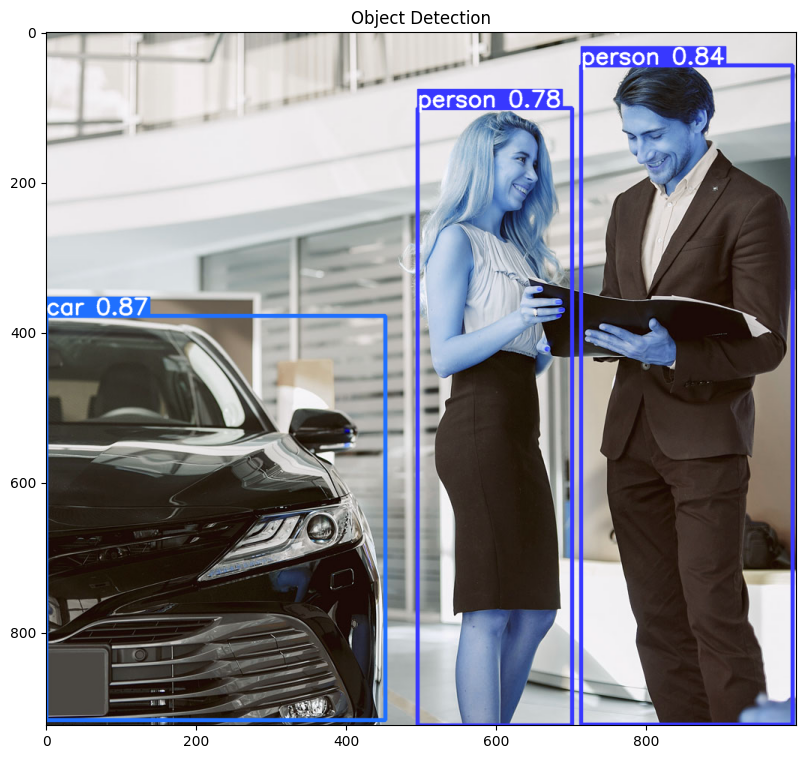

In [7]:
img='/content/drive/MyDrive/Segment/For Segmentation'
detect_results=det_model.predict(img) #for detection (To know the difference between object detection and instance segmentation)
detect_result_array1=detect_results[0].plot()
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(1,1,1)
ax1.set_title("Object Detection")
ax1.imshow(detect_result_array1)


In [8]:
img='/content/drive/MyDrive/Segment/For Segmentation'
instance_results=inst_model.predict(img) #convert into numpy array and it gives the result
detect_results=det_model.predict(img) #for detection (To know the difference between object detection and instance segmentation)


image 1/3 /content/drive/MyDrive/Segment/For Segmentation/about.jpg: 608x640 2 persons, 1 car, 1 tie, 504.4ms
image 2/3 /content/drive/MyDrive/Segment/For Segmentation/car-8.jpg: 448x640 2 cars, 1 truck, 331.5ms
image 3/3 /content/drive/MyDrive/Segment/For Segmentation/image_6.jpg: 448x640 4 persons, 1 bottle, 1 cell phone, 319.2ms
Speed: 5.4ms preprocess, 385.0ms inference, 25.0ms postprocess per image at shape (1, 3, 448, 640)

image 1/3 /content/drive/MyDrive/Segment/For Segmentation/about.jpg: 608x640 2 persons, 1 car, 315.8ms
image 2/3 /content/drive/MyDrive/Segment/For Segmentation/car-8.jpg: 448x640 2 cars, 1 truck, 235.4ms
image 3/3 /content/drive/MyDrive/Segment/For Segmentation/image_6.jpg: 448x640 3 persons, 1 car, 1 cell phone, 223.6ms
Speed: 4.5ms preprocess, 258.3ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


In [9]:

instance_result_array=instance_results[0].plot()
print("Number of images",len(instance_results))
#print(instance_results[0])
#print(instance_results[0].masks)

print(len(instance_results[0].masks.xy))
print(type(instance_results[0].masks.xy[0]))
print(instance_results[0].masks.xy[0].shape)
print(instance_results[0].masks.xy[1].shape)
print(instance_results[0].masks.xy[2].shape)
print(instance_results[0].masks.xy[3].shape)
#print(instance_results[0].masks.xy[3])
#fig=plt.figure(figsize=(18,9))
#ax1=fig.add_subplot(1,1,1)
#ax1.set_title("Instance Segmentation")
#ax1.imshow(instance_result_array)


Number of images 3
4
<class 'numpy.ndarray'>
(206, 2)
(499, 2)
(441, 2)
(73, 2)


In [10]:
instance_result_array1=instance_results[1].plot()

#print(instance_results[0])
#print(instance_results[0].masks)

print(len(instance_results[1].masks.xy))
print(type(instance_results[1].masks.xy[0]))
print(instance_results[1].masks.xy[0].shape)
print(instance_results[1].masks.xy[1].shape)
print(instance_results[1].masks.xy[2].shape)

#print(instance_results[0].masks.xy[3])
#fig=plt.figure(figsize=(18,9))
#ax1=fig.add_subplot(1,1,1)
#ax1.set_title("Instance Segmentation")
#ax1.imshow(instance_result_array)

3
<class 'numpy.ndarray'>
(61, 2)
(629, 2)
(52, 2)


In [11]:
instance_result_array2=instance_results[2].plot()

#print(instance_results[0])
#print(instance_results[0].masks)

print(len(instance_results[2].masks.xy))
print(type(instance_results[2].masks.xy[0]))
print(instance_results[2].masks.xy[0].shape)
print(instance_results[2].masks.xy[1].shape)
print(instance_results[2].masks.xy[2].shape)
print(instance_results[2].masks.xy[3].shape)
print(instance_results[2].masks.xy[4].shape)
print(instance_results[2].masks.xy[5].shape)
#print(instance_results[0].masks.xy[3])
#fig=plt.figure(figsize=(18,9))
#ax1=fig.add_subplot(1,1,1)
#ax1.set_title("Instance Segmentation")
#ax1.imshow(instance_result_array)

6
<class 'numpy.ndarray'>
(436, 2)
(56, 2)
(368, 2)
(71, 2)
(282, 2)
(230, 2)


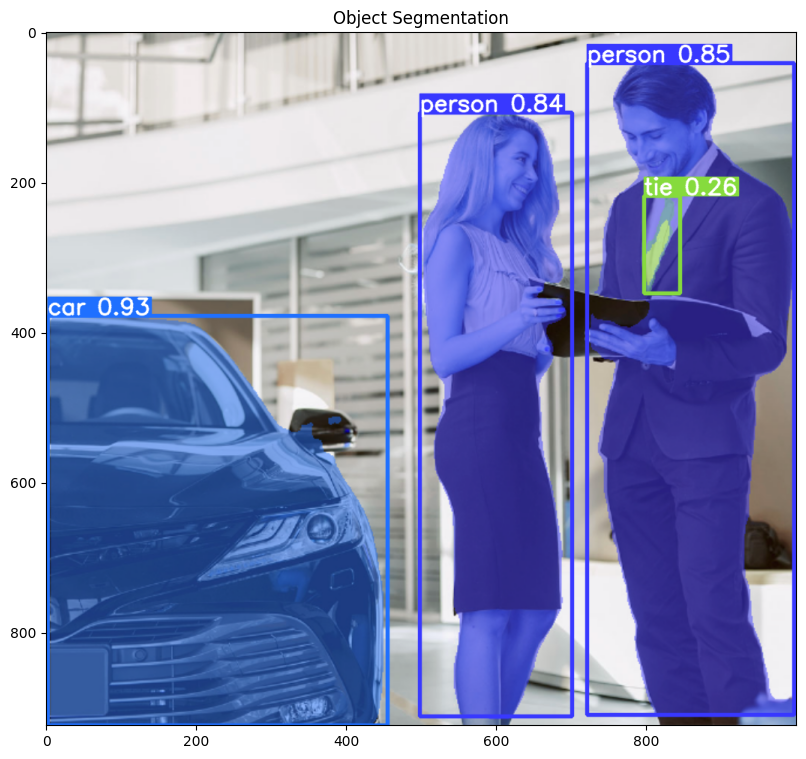

In [12]:
instance_result_array1=instance_results[0].plot()
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(1,1,1)
ax1.set_title("Object Segmentation")
ax1.imshow(instance_result_array1)

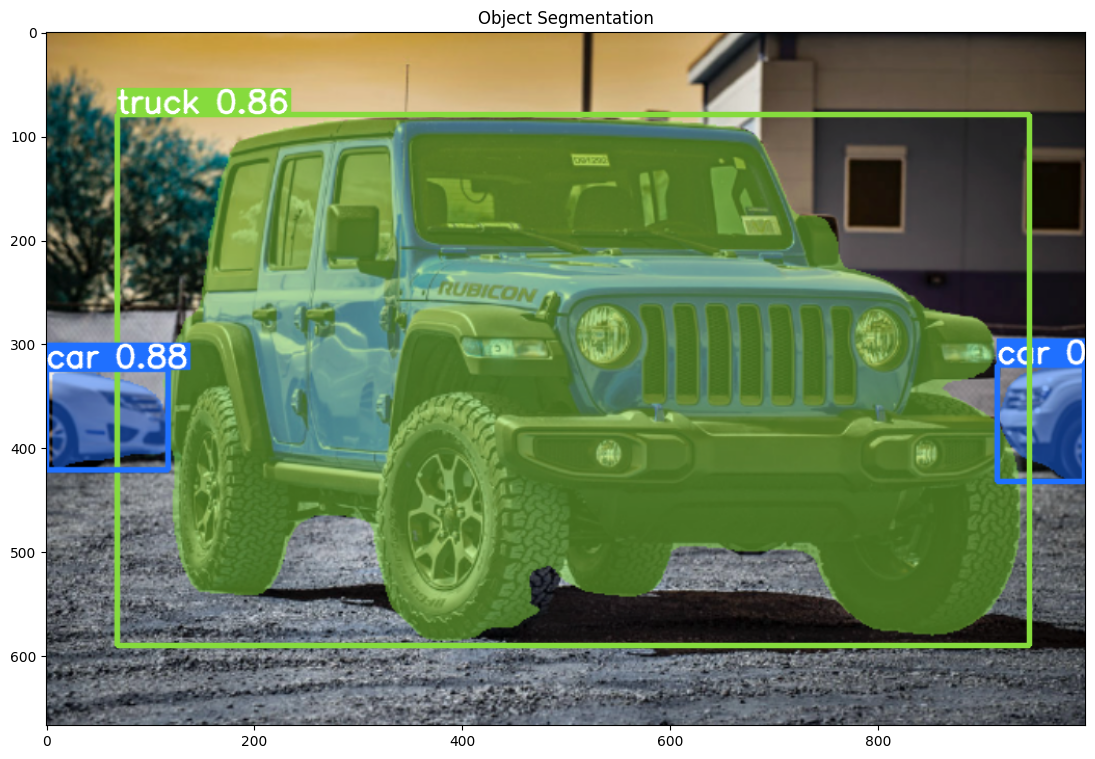

In [13]:
instance_result_array2=instance_results[1].plot()
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(1,1,1)
ax1.set_title("Object Segmentation")
ax1.imshow(instance_result_array2)

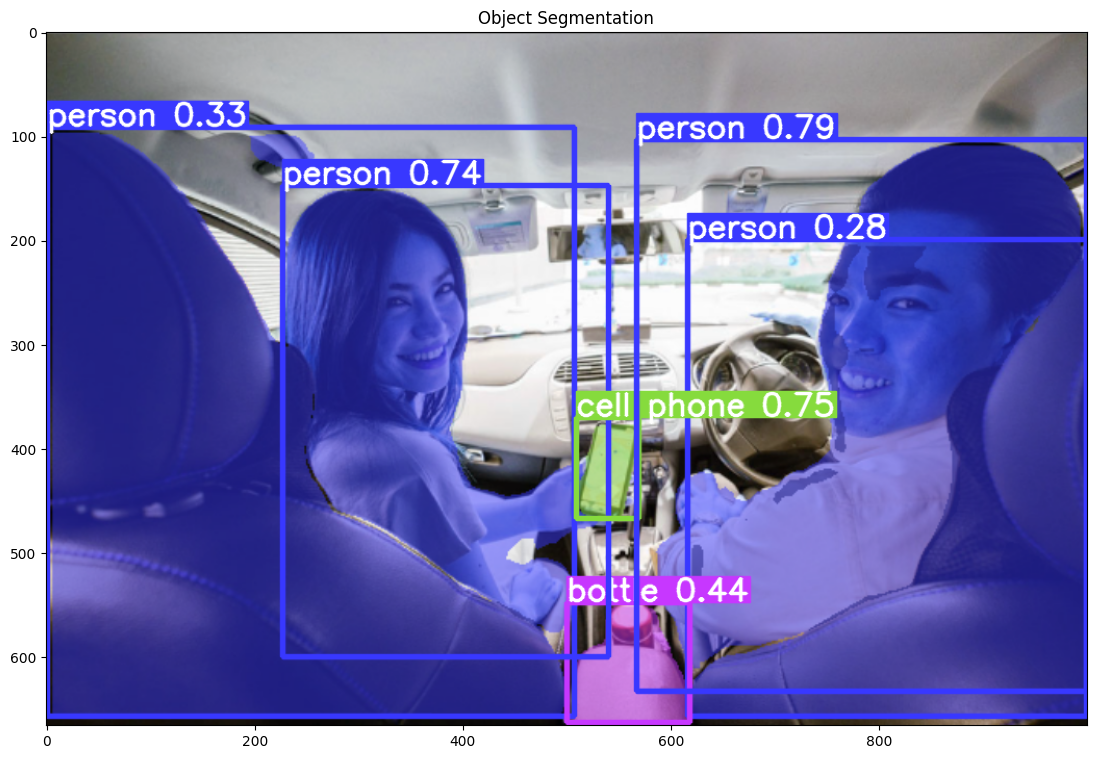

In [14]:
instance_result_array3=instance_results[2].plot()
fig=plt.figure(figsize=(18,9))
ax1=fig.add_subplot(1,1,1)
ax1.set_title("Object Segmentation")
ax1.imshow(instance_result_array3)